# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline


Bad key savefig.frameon in file C:\Users\Thom\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Thom\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Thom\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

In [2]:
# Load .env enviroment variables
load_dotenv("./environment/gitignore.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73711.20
The current value of your 5.3 ETH is $22769.65


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [13]:
# Format current date as ISO format
#today = pd.Timestamp( pd.datetime.today(), tz="America/New_York").isoformat()
today = pd.Timestamp('2021-10-28', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_df = api.get_barset(tickers, timeframe ,start = today, end = today, limit = 1000).df
ticker_df.index = ticker_df.index.date

# Preview DataFrame
ticker_df.head()


AGG                                       SPY                 \
              open     high     low   close   volume    open   high     low   
2021-10-28  114.71  114.825  114.57  114.65  4971007  455.46  458.4  455.45   

                              
             close    volume  
2021-10-28  458.27  43081788

In [14]:
# Pick AGG and SPY close prices
agg_close_price = ticker_df["AGG"]["close"][0]
spy_close_price = ticker_df["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.65
Current SPY closing price: $458.27


In [15]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22913.50
The current value of your 200 AGG shares is $22930.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({
        "amount" : [ crypto_value, shares_value]
        })
df_savings.index = ["crypto" , "shares"]

# Display savings DataFrame
display(df_savings)

amount
crypto  96480.848
shares  45843.500

array([<AxesSubplot:ylabel='amount'>], dtype=object)

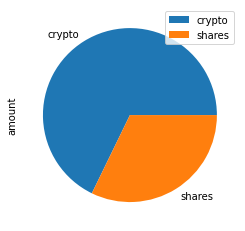

In [17]:
# Plot savings pie chart
df_savings.plot(kind = "pie", subplots=True)

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum(axis=0)[0]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund: 
    print("Congratulations! You just reached your financial goal for your savings")
else:
    remain = emergency_fund - total_savings
    print(f"You are on the good way! There is only {remain}$ missing before ahcieving your financial goal for your savings.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [38]:
# Set start and end dates of five years back from today.

# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-28', tz='America/New_York').isoformat()

#end_date = pd.Timestamp( pd.datetime.today(), tz="America/New_York").isoformat()

In [39]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

growth_df = api.get_barset(tickers,
                           timeframe ,
                           start = start_date,
                           end = end_date,
                           limit = 1000).df

growth_df.index = growth_df.index.date

# Display sample data
growth_df.head(50)

AGG                                            SPY            \
              open      high       low     close   volume    open      high   
2017-11-08  109.54  109.6000  109.4600  109.5000  2228734  258.46  259.2200   
2017-11-09  109.39  109.4600  109.3000  109.4200  1941380  257.73  258.3900   
2017-11-10  109.06  109.1500  108.9700  108.9850  1488306  257.73  258.2100   
2017-11-13  109.11  109.1100  108.9600  108.9800  1677797  257.32  258.5900   
2017-11-14  109.01  109.1200  109.0000  109.1050  2663310  257.40  258.3581   
2017-11-15  109.26  109.3800  109.1400  109.3300  1959296  256.62  257.2200   
2017-11-16  109.22  109.3200  109.1750  109.1800  1754309  257.52  259.0400   
2017-11-17  109.33  109.3900  109.2600  109.3200  1779593  258.22  258.4400   
2017-11-20  109.23  109.3000  109.1800  109.2500  2383640  258.14  258.5250   
2017-11-21  109.39  109.4300  109.2220  109.3400  1939152  259.18  260.2000   
2017-11-22  109.40  109.5600  109.3800  109.5500  5577462  260.03  260.1500   
2017-11-24  109.50  109.5600  109.4800  109.5200  1255510  260.28  260.4800   
2017-11-27  109.53  109.5800  109.4400  109.5200  2012690  260.41  260.7500   
2017-11-28  109.59  109.6300  109.4700  109.5000  3323300  260.76  262.9000   
2017-11-29  109.27  109.3200  109.1789  109.2700  2070585  263.02  263.6300   
2017-11-30  109.25  109.3000  109.0200  109.0800  2627063  263.76  266.0500   
2017-12-01  109.02  109.4800  108.8450  109.1600  3039439  264.77  265.3100   
2017-12-04  109.03  109.1700  109.0000  109.1600  2230286  266.31  266.8000   
2017-12-05  109.09  109.2600  109.0800  109.2450  2710349  264.43  265.1500   
2017-12-06  109.42  109.5200  109.3700  109.3700  2719857  262.87  263.7300   
2017-12-07  109.44  109.4600  109.1536  109.2300  2430316  263.09  264.4300   
2017-12-08  109.21  109.2900  109.1450  109.1900  1533143  265.01  265.5200   
2017-12-11  109.29  109.3200  109.1300  109.1300  2475019  265.57  266.3800   
2017-12-12  109.07  109.1100  108.9500  109.1000  2839614  266.59  267.3200   
2017-12-13  109.23  109.5500  109.1350  109.4100  2638160  267.06  267.5600   
2017-12-14  109.31  109.5100  109.2300  109.4500  3698172  267.12  267.2200   
2017-12-15  109.42  109.5500  109.3150  109.4700  2034072  265.45  267.0400   
2017-12-18  109.47  109.4700  109.2500  109.3100  3090761  268.08  268.6000   
2017-12-19  109.14  109.1600  108.8900  109.0000  2583809  268.48  268.5300   
2017-12-20  108.75  108.8800  108.7059  108.7700  3123756  268.25  268.3300   
2017-12-21  108.76  108.8700  108.7300  108.8300  2173058  267.73  268.3850   
2017-12-22  108.82  108.8900  108.8100  108.8800  2952430  267.60  267.6350   
2017-12-26  108.91  109.0100  108.8700  108.9600  1717408  267.06  267.3900   
2017-12-27  109.02  109.3250  109.0200  109.2850  1863189  267.36  267.7300   
2017-12-28  109.22  109.2599  109.1435  109.2200  2490982  267.85  267.9200   
2017-12-29  109.28  109.3900  109.2400  109.3400  2073522  268.55  268.5500   
2018-01-02  109.26  109.3100  108.9700  109.1700  5495219  267.84  268.8100   
2018-01-03  109.25  109.2500  109.0900  109.1900  2131463  268.95  270.6400   
2018-01-04  109.02  109.1500  108.9747  109.1200  2706462  271.21  272.1600   
2018-01-05  109.15  109.1500  108.9500  109.0210  2936467  272.50  273.5600   
2018-01-08  109.11  109.1100  108.9500  109.0000  2842958  273.31  274.1000   
2018-01-09  108.91  108.9100  108.6900  108.7100  1991045  274.40  275.2500   
2018-01-10  108.48  108.7200  108.4300  108.7100  3272935  273.69  274.4200   
2018-01-11  108.66  108.8600  108.6100  108.7700  2652838  274.75  276.0900   
2018-01-12  108.64  108.8300  108.6300  108.7401  2950016  276.42  278.1100   
2018-01-16  108.87  108.9800  108.7150  108.7600  6011248  279.35  280.0900   
2018-01-17  108.73  108.8390  108.6200  108.6500  2880481  278.04  280.0500   
2018-01-18  108.43  108.5250  108.3500  108.3800  2681682  279.50  279.9600   
2018-01-19  108.40  108.4000  108.1400  108.1500  2751607  279.80

In [40]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weight_lst = [0.4 , 0.6 ]
trad_years = 30
simulations = 500
trad_days = trad_years*252

# Run simulation 
share_simulation = MCSimulation(portfolio_data = growth_df,
                                weights= weight_lst, 
                                num_simulation= simulations,
                                num_trading_days= trad_days
                               )



In [41]:
# Printing the simulation input data
share_simulation.portfolio_data.head()

AGG                                                    SPY  \
              open    high     low    close   volume daily_return    open   
2017-11-08  109.54  109.60  109.46  109.500  2228734          NaN  258.46   
2017-11-09  109.39  109.46  109.30  109.420  1941380    -0.000731  257.73   
2017-11-10  109.06  109.15  108.97  108.985  1488306    -0.003976  257.73   
2017-11-13  109.11  109.11  108.96  108.980  1677797    -0.000046  257.32   
2017-11-14  109.01  109.12  109.00  109.105  2663310     0.001147  257.40   

                                                             
                high     low   close    volume daily_return  
2017-11-08  259.2200  258.15  259.13  32174191          NaN  
2017-11-09  258.3900  256.36  258.20  75322217    -0.003589  
2017-11-10  258.2100  257.37  258.08  35755951    -0.000465  
2017-11-13  258.5900  257.27  258.34  31963013     0.001007  
2017-11-14  258.3581  256.52  257.75  41935632    -0.002284

In [42]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
share_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4         5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1      1.007474   0.996639   0.999265   1.006760   0.991207  0.996736   
2      1.006691   1.008081   0.992146   1.000772   0.995485  0.995186   
3      1.005722   0.999185   0.973512   0.996777   0.995309  0.992904   
4      1.011509   1.007674   0.983709   1.006728   0.984511  0.986942   
...         ...        ...        ...        ...        ...       ...   
7556  21.490580  11.426532  28.302445   9.983978  11.114280  7.977014   
7557  21.427074  11.319446  28.469093  10.023039  11.066698  8.008355   
7558  21.373959  11.291613  29.007560  10.043240  11.192707  8.027249   
7559  21.618190  11.285416  29.045354   9.996922  11.139943  8.094671   
7560  21.793826  11.275991  28.751680   9.973043  11.081909  7.993890   

           6          7          8          9    ...        490        491  \
0     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1     1.005064   1.000365   0.985608   1.022863  ...   1.006151   1.011828   
2     1.007111   1.003486   1.001768   1.014873  ...   1.002757   1.000022   
3     1.013725   1.014792   1.018902   1.021754  ...   1.018748   1.006019   
4     1.012072   1.012730   1.016785   1.015783  ...   1.015997   1.011317   
...        ...        ...        ...        ...  ...        ...        ...   
7556  7.050984  29.613297  19.859980  87.881298  ...  29.783219  13.779482   
7557  7.016685  29.369083  19.912401  88.016124  ...  29.854051  13.818049   
7558  6.957678  29.401177  20.031236  86.749832  ...  29.709179  13.689672   
7559  6.906776  29.786709  20.028393  86.717031  ...  29.995772  13.645915   
7560  6.981905  29.593302  19.939456  88.026407  ...  30.443428  13.780983   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.997281   1.007487   0.987904   1.000754   0.990138   0.983076   
2      0.989143   1.018041   0.986820   1.001113   0.983034   0.996261   
3      0.996200   1.023119   0.987372   1.002972   0.986326   1.001264   
4      1.001051   1.022109   0.987716   0.991061   0.993436   1.014501   
...         ...        ...        ...        ...        ...        ...   
7556  13.797990  16.013694  34.521384  27.997640  16.807773  43.325829   
7557  13.958398  16.031622  34.559609  28.340794  16.826483  43.762045   
7558  14.021345  16.135434  34.731029  27.806039  16.871223  44.033875   
7559  14.231075  16.252699  34.408617  27.644931  16.896033  43.443050   
7560  14.263469  16.375870  34.505304  27.701597  16.866906  43.379685   

            498        499  
0      1.000000   1.000000  
1      1.015208   0.996803  
2      1.009506   0.991294  
3      1.004914   0.994990  
4      1.000791   1.002145  
...         ...        ...  
7556  20.920043  47.183052  
7557  20.847703  47.692355  
7558  20.665926  47.964999  
7559  20.725915  47.980504  
7560  20.970243  47.945705  

[7561 rows x 500 columns]

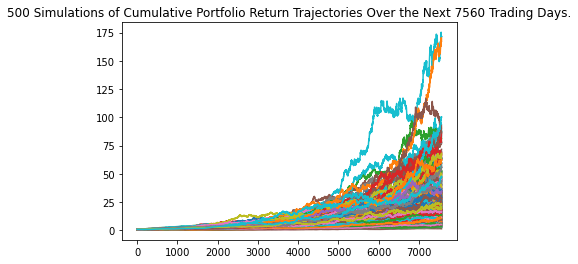

In [43]:
# Plot simulation outcomes
cumul_plot = share_simulation.plot_simulation()


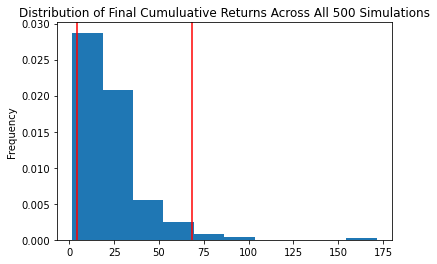

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = share_simulation.plot_distribution()

### Retirement Analysis

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
recap = share_simulation.summarize_cumulative_return()

# Print summary statistics
print(recap)

count           500.000000
mean             23.401630
std              18.916622
min               1.530858
25%              11.246954
50%              19.124360
75%              29.535378
max             171.407745
95% CI Lower      4.326106
95% CI Upper     68.525387
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(recap[8]*initial_investment,2)
ci_upper = round(recap[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86522.13 and $1370507.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [47]:
# Set increase in the investement
increasing = 1.5
increased_investment = initial_investment * increasing

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
pct_lower = round(ci_lower * increasing, 2)
pct_upper = round(ci_upper * increasing, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${pct_lower} and ${pct_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $129783.2 and $2055761.6


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Checking data from the bound to estimate which has the most potential growth
closing_agg =  growth_df["AGG"]["close"]
closing_return_agg = closing_agg.pct_change()
closing_return_agg.describe()

In [ ]:
# Checking data from the stock to estimate which has the most potential growth
closing_spy =  growth_df["SPY"]["close"]
closing_return_spy = closing_spy.pct_change()
closing_return_spy.describe()


In [57]:
# Initialize a Dataframe to compare the past result of AGG and SPY, in order to determine which change in the portfolio could increase return.
closing =  pd.concat(  [ growth_df["AGG"]["close"] , growth_df["SPY"]["close"] ] , axis= "columns", join= "inner")

# Calculate returns and adjust df for readability
closing_return = closing.pct_change()
closing_return.columns = ["AGG (bound)" , "SPY (share)" ]
closing_return.describe()

AGG (bound)  SPY (share)
count   999.000000   999.000000
mean      0.000051     0.000659
std       0.003231     0.013253
min      -0.040343    -0.115916
25%      -0.001161    -0.003603
50%       0.000133     0.001056
75%       0.001306     0.006663
max       0.027948     0.094737

<AxesSubplot:ylabel='Density'>

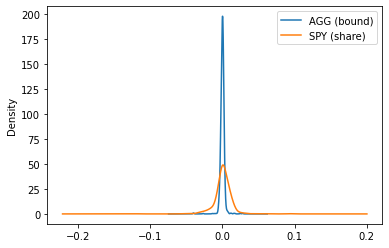

In [58]:
# Plot desnsity curve in order to give some insight about the retunr 
closing_return.plot.density()

In [ ]:
## Pct change of "SPY" is +-12 times larger then that of "AGG", but has more volatility. In order to increase the return I did increase by 20% the amount of "SPY"

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

#Adapt inputs for the simulation
weigthed_early = [0.8 , 0.2]
year5 = 5
trad_days_5y = year5*252

# Set initial investment for an eaarly retirment
investement_early = 60000

share_simulation_5y = MCSimulation(portfolio_data = growth_df,
                                weights= weigthed_early, 
                                num_simulation= simulations,
                                num_trading_days= trad_days_5y
                               )

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
share_simulation_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.003101  1.002449  0.994666  1.002442  1.006087  1.000121  1.000116   
2     1.002868  1.000502  0.990282  0.999660  1.004575  1.000720  1.001924   
3     1.008970  1.004777  0.989893  0.994847  0.996179  1.002898  1.006331   
4     1.010972  1.002762  0.982820  0.995067  0.996170  1.000397  1.008927   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.139619  1.061555  1.026949  1.230119  1.355300  1.192083  1.091303   
1257  1.137309  1.069728  1.026503  1.233597  1.360582  1.183569  1.087727   
1258  1.136407  1.066028  1.021320  1.229273  1.355481  1.184901  1.087436   
1259  1.136136  1.055532  1.027868  1.232868  1.349739  1.183562  1.088907   
1260  1.148052  1.051985  1.028193  1.231793  1.345885  1.193061  1.094644   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997356  0.998154  0.999177  ...  0.999721  1.002310  0.990722   
2     0.998705  0.998233  0.999235  ...  1.000397  1.001555  0.989613   
3     0.998001  0.997116  1.000357  ...  0.998723  1.001839  0.982725   
4     0.997639  0.998534  1.003165  ...  1.000176  1.006529  0.985389   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.506820  1.422583  1.087167  ...  1.417550  1.262973  1.234209   
1257  1.503927  1.426408  1.090334  ...  1.412468  1.267467  1.236947   
1258  1.508819  1.429920  1.086815  ...  1.410412  1.264141  1.237272   
1259  1.513810  1.429432  1.090583  ...  1.410453  1.272265  1.237191   
1260  1.511948  1.427424  1.088222  ...  1.416225  1.271950  1.231158   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000739  0.998726  1.008478  1.002481  0.994159  1.004001  0.999573  
2     0.998374  0.994436  1.018037  1.010031  0.994591  1.002526  0.998966  
3     0.997340  0.990404  1.016203  1.013637  0.987891  1.005155  0.997370  
4     0.991177  0.997833  1.014112  1.010735  0.988897  1.006068  0.995099  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.294464  1.191847  1.129643  0.967821  1.270706  1.046496  1.353422  
1257  1.292197  1.186169  1.129133  0.965554  1.275576  1.044628  1.360588  
1258  1.298574  1.181790  1.128911  0.964581  1.276531  1.044446  1.364929  
1259  1.290279  1.188490  1.130356  0.966455  1.275787  1.043384  1.363525  
1260  1.300773  1.186770  1.136616  0.969942  1.274494  1.040785  1.369667  

[1261 rows x 500 columns]

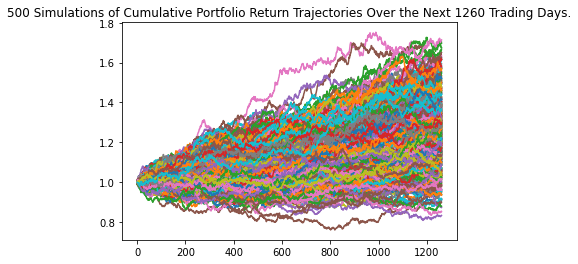

In [61]:
# Plot simulation outcomes
cumul_plot_5y = share_simulation_5y.plot_simulation()

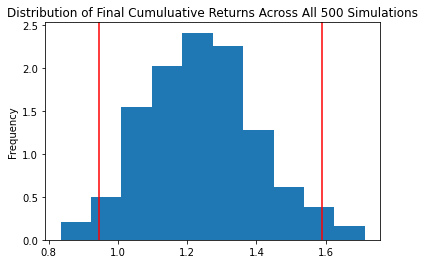

In [62]:
# Plot probability distribution and confidence intervals
dist_plot_5y = share_simulation_5y.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
recap_5y = share_simulation_5y.summarize_cumulative_return()

# Print summary statistics
print(recap_5y)

count           500.000000
mean              1.239712
std               0.162547
min               0.833767
25%               1.125338
50%               1.229683
75%               1.344890
max               1.713194
95% CI Lower      0.943995
95% CI Upper      1.589600
Name: 1260, dtype: float64


In [64]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5y = round(recap_5y[8]*investement_early,2)
ci_upper_5y = round(recap_5y[9]*investement_early,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${investement_early} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5y} and ${ci_upper_5y}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56639.68 and $95375.99


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns. All parameters remain the same as for 5 years except the trading days
year10 = 10
trad_days_10y = year10*252

share_simulation_10y = MCSimulation(portfolio_data = growth_df,
                                weights= weigthed_early, 
                                num_simulation= simulations,
                                num_trading_days= trad_days_10y
                               )

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
share_simulation_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.990690  1.002035  1.001952  1.003007  1.002338  1.005649  0.999035   
2     0.990072  0.998349  0.995465  1.007624  0.999359  1.002952  0.995609   
3     0.991133  0.994408  0.995756  1.000852  1.002916  1.009041  0.992361   
4     0.990845  0.993319  0.995739  0.998094  1.006277  1.011352  0.989527   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.556365  1.544894  1.332252  1.384376  1.348619  1.805427  2.155495   
2517  1.554375  1.548583  1.332375  1.387153  1.350473  1.802681  2.160687   
2518  1.555791  1.549071  1.325609  1.395972  1.345760  1.801235  2.161554   
2519  1.558072  1.553868  1.324747  1.392801  1.354377  1.793932  2.156109   
2520  1.549667  1.557710  1.323522  1.396755  1.355343  1.782468  2.162812   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003424  0.997991  1.001972  ...  1.004084  1.001805  0.999061   
2     1.009237  0.997280  0.994950  ...  1.005422  1.004706  1.000317   
3     1.005602  0.999397  0.994004  ...  1.002885  1.008215  0.997867   
4     1.010490  0.998542  0.996283  ...  1.004190  1.010432  0.996556   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.297225  1.535897  2.182542  ...  1.444357  1.639600  1.629222   
2517  1.300167  1.537754  2.175706  ...  1.438374  1.643271  1.632946   
2518  1.304413  1.537166  2.162999  ...  1.433604  1.645662  1.626303   
2519  1.307788  1.534057  2.154809  ...  1.424357  1.646141  1.622746   
2520  1.302601  1.542329  2.173646  ...  1.428589  1.653099  1.616758   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007100  0.995916  0.999272  0.992728  0.999724  1.000515  1.004453  
2     1.007923  0.996041  1.000940  0.992885  0.994162  1.002186  1.009526  
3     1.006337  0.996420  1.002470  0.998027  0.992315  1.000188  1.004957  
4     1.003543  0.999529  1.002822  0.999814  0.992559  1.001200  1.003053  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.065536  1.506229  1.454743  1.616557  2.014233  1.114720  1.146869  
2517  2.061762  1.508261  1.452875  1.615478  2.011215  1.114349  1.144541  
2518  2.053982  1.512107  1.441117  1.607964  1.996834  1.110067  1.144366  
2519  2.050646  1.516057  1.434175  1.601173  1.989850  1.102057  1.143645  
2520  2.064135  1.525104  1.422526  1.603008  1.992735  1.100771  1.149560  

[2521 rows x 500 columns]

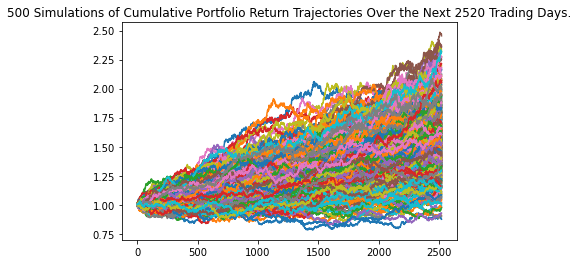

In [67]:
# Plot simulation outcomes
cumul_plot_10y = share_simulation_10y.plot_simulation()

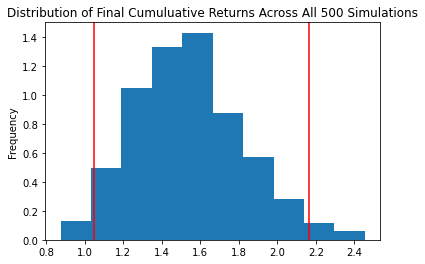

In [68]:
# Plot probability distribution and confidence intervals
dist_plot_10y = share_simulation_10y.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
recap_10y = share_simulation_10y.summarize_cumulative_return()

# Print summary statistics
print(recap_10y)

count           500.000000
mean              1.540909
std               0.282106
min               0.874537
25%               1.338664
50%               1.527578
75%               1.722440
max               2.455017
95% CI Lower      1.050209
95% CI Upper      2.163490
Name: 2520, dtype: float64


In [70]:
# Set initial investment : is the same than for the early retirement option of 5years

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10y = round(recap_10y[8]*investement_early,2)
ci_upper_10y = round(recap_10y[9]*investement_early,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${investement_early} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_10y} and ${ci_upper_10y}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $63012.53 and $129809.41
